In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import FuncAnimation
from matplotlib import cm
import pickle

%matplotlib notebook

In [2]:
with open('/Users/vanessa/Downloads/x100_y100_t5000_ru1_rv05_f_055_k062.pkl', 'rb') as f:
  time_array = pickle.load(f)

In [3]:
def update(frame):
    #Place holder. Function to increment through time of distribution
    image1.set_data(distribution1[:,:,frame])
    image2.set_data(distribution2[:,:,frame])

In [4]:
#Create base for PDE solution to be plotted over
x = np.linspace(0, len(time_array), num=len(time_array))
y = np.linspace(0, len(time_array[0]), num=len(time_array[0]))
X, Y = np.meshgrid(x, y)

time = np.linspace(0,1,num=len(time_array[0,0]))

distribution1 = time_array[:,:,:,0] #over time
distribution2 = time_array[:,:,:,1] #over time

<IPython.core.display.Javascript object>


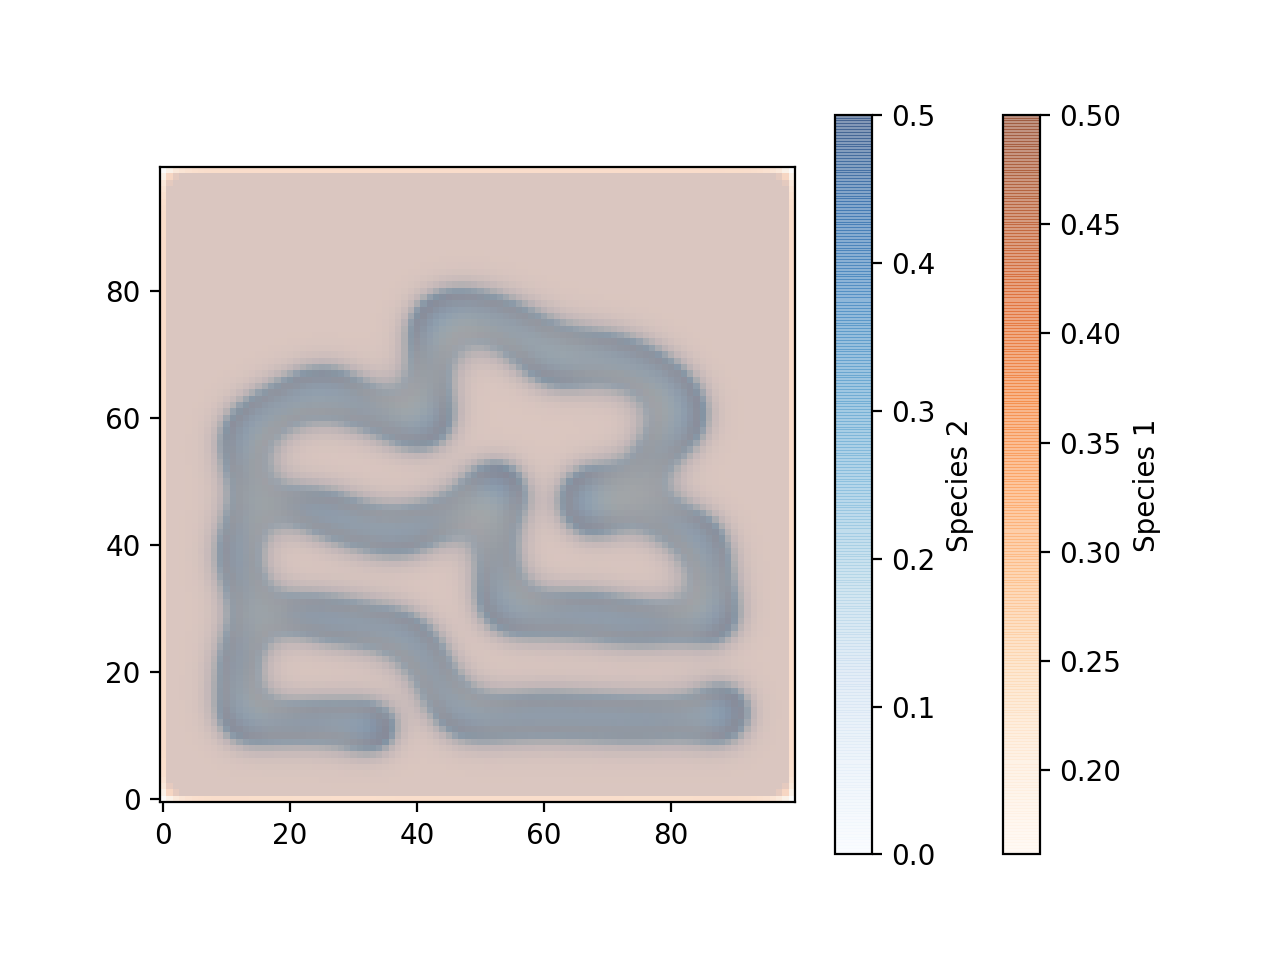

In [25]:
#Plotting:
fps = 30
fig, ax = plt.subplots()
image1 = ax.imshow(distribution1[:,:,0], cmap='Oranges',origin='lower', alpha=0.5, vmin=np.amin(distribution1), vmax=np.amax(distribution1)*0.5)
image2 = ax.imshow(distribution2[:,:,0], cmap='Blues',origin='lower', alpha=0.5,vmin=np.amin(distribution2), vmax=np.amax(distribution2)*0.5)

fig.colorbar(image1, label='Species 1')
fig.colorbar(image2, label='Species 2')

animator = FuncAnimation(fig, update, frames=len(time), interval=1000/fps, repeat=True, cache_frame_data=False)
fileName = "diffusionReactionSim_"+str(len(time_array[0,0]))+"TimeSteps_"+str(len(time_array[0,0,0]))+"Components.gif"
#animator.save(fileName, writer=animation.PillowWriter(fps=fps))
plt.show()